In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf

In [ ]:
!unzip -q "/content/drive/My Drive/train.zip"

In [ ]:
!unzip -q "/content/drive/My Drive/test1.zip"

In [ ]:
train_dir = '/content/train/'
test_dir = '/content/test1/'

In [ ]:
import numpy as np 
import pandas as pd 

import shutil
from tqdm import tqdm

import os
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#upload a picture
from google.colab import files

uploaded = files.upload()

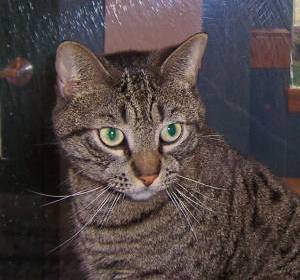

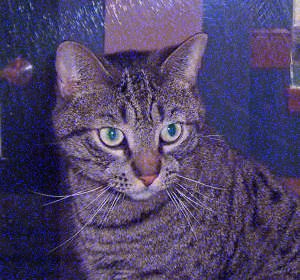

In [ ]:
#Gaussian Noise   

img = cv2.imread('/content/cat.1.jpg')
cv2_imshow(img)

im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
mean = 0
sigma = 100
cv2.randn(im,mean,sigma) # create the random distribution
output = cv2.add(img, im) # add the noise to the original image
cv2_imshow(output)

In [ ]:
#Gaussian Noise function
def gaussian_noise(img):
  img = cv2.imread('img')
  
  im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
  mean = 0
  sigma = 100
  
  cv2.randn(im,mean,sigma) # create the random distribution
  output = cv2.add(img, im) # add the noise to the original image
  
  return output

In [ ]:
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(train_dir+"dog_gaussian_noise"): 
    os.mkdir(train_dir+"dog_gaussian_noise")
if not os.path.exists(train_dir+"cat_gaussian_noise"):
    os.mkdir(train_dir+"cat_gaussian_noise")

In [ ]:
for i in tqdm(os.listdir(train_dir)):
  noise_img = gaussian_noise(i)
  if noise_img.split(".")[0] == "dog":
    shutil.move(os.path.join(train_dir,i),os.path.join(train_dir+"dog_gaussian_noise/",i))
  elif noise_img.split(".")[0] == "cat":
    shutil.move(os.path.join(train_dir,i),os.path.join(train_dir+"cat_gaussian_noise/",i))


In [ ]:
#Motion Blur
img = cv2.imread('/content/cat.1.jpg')
cv2_imshow(img)

size = 15

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)

cv2_imshow(output)

NameError: ignored

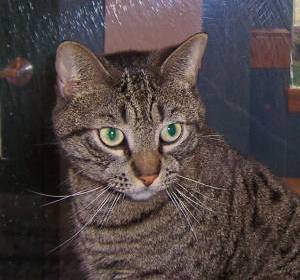

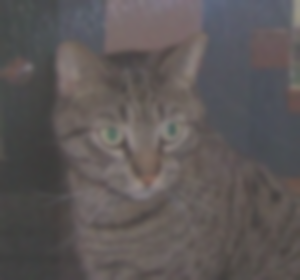

In [ ]:
#Gaussian Blur
import cv2
import numpy as np

img = cv2.imread('/content/cat.1.jpg')
cv2_imshow(img)


dst = np.empty_like(img) #create empty array the size of the image
noise = cv2.randn(dst, (0,0,0), (20,20,20)) #add random img noise

# Pass img through noise filter to add noise
pup_noise = cv2.addWeighted(img, 0.5, noise, 0.5, 50) 

# Blurring function; kernel=15, sigma=auto
pup_blur = cv2.GaussianBlur(pup_noise, (15, 15), 0)

cv2_imshow(pup_blur)